In [1]:
#LIMPIEZA Y MANIPULACION DE DATOS
import pandas as pd
import re
from unidecode import unidecode
import numpy as np

#FUNCIONES
from funciones_usisa_prediccion_ventas import *

#VISUALIZACION
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# LIMPIEZA Y MANIPULACIÓN DE DATOS

#### CARGAR Y EDITAR DATA NUEVO

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_nuevo = pd.read_csv("tienda_online_nuevo.csv")

In [4]:
df_nuevo = todas_las_funciones_nuevo(df_nuevo)

#### CARGAR Y EDITAR DATA ANTIGUO

In [5]:
df_antiguo = pd.read_excel("tienda_online_antiguo.xlsx")

In [6]:
df_antiguo = todas_las_funciones_antiguo(df_antiguo)

#### CONCATENAR DF_NUEVO Y DF_ANTIGUO

In [7]:
df = concatenar(df_antiguo,df_nuevo)

# FRECUENCIA TIMESERIES - DIARIO

In [8]:
timeseries_diario = agrupar_diario(df)
timeseries_diario = timeseries_diario.iloc[:-1] #ELIMINAMOS EL ULTIMO DIA SI NO TENEMOS LOS DATOS COMPLETOS

In [9]:
timeseries_diario.head()

,total_pedidos,total_facturacion(€)
fecha,,
2017-12-05,4,508.65
2017-12-06,1,29.86
2017-12-07,1,294.01
2017-12-08,0,0.00
2017-12-09,0,0.00


In [10]:
#COMPORBACION: NO HAY DATOS FALTANTES 
comprobacion_saltos = timeseries_diario.copy()
comprobacion_saltos['fecha'] = comprobacion_saltos.index
comprobacion_saltos['date_check'] = comprobacion_saltos['fecha'].diff()
comprobacion_saltos.date_check.value_counts()

1 days    2177
Name: date_check, dtype: int64

# EDA

#### GRÁFICO HISTÓRICO TOTAL DINERO FACTURADO POR DÍA

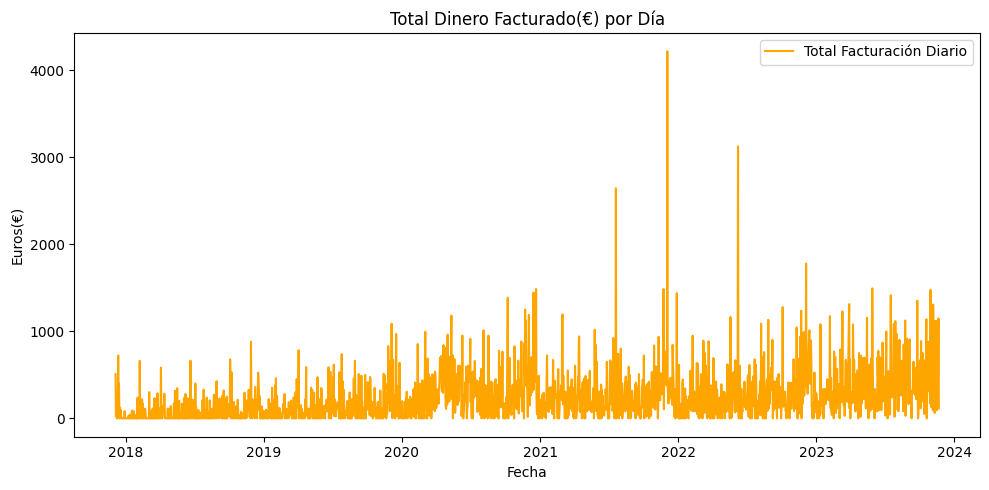

In [11]:
timeseries_facturacion_diario(timeseries_diario)

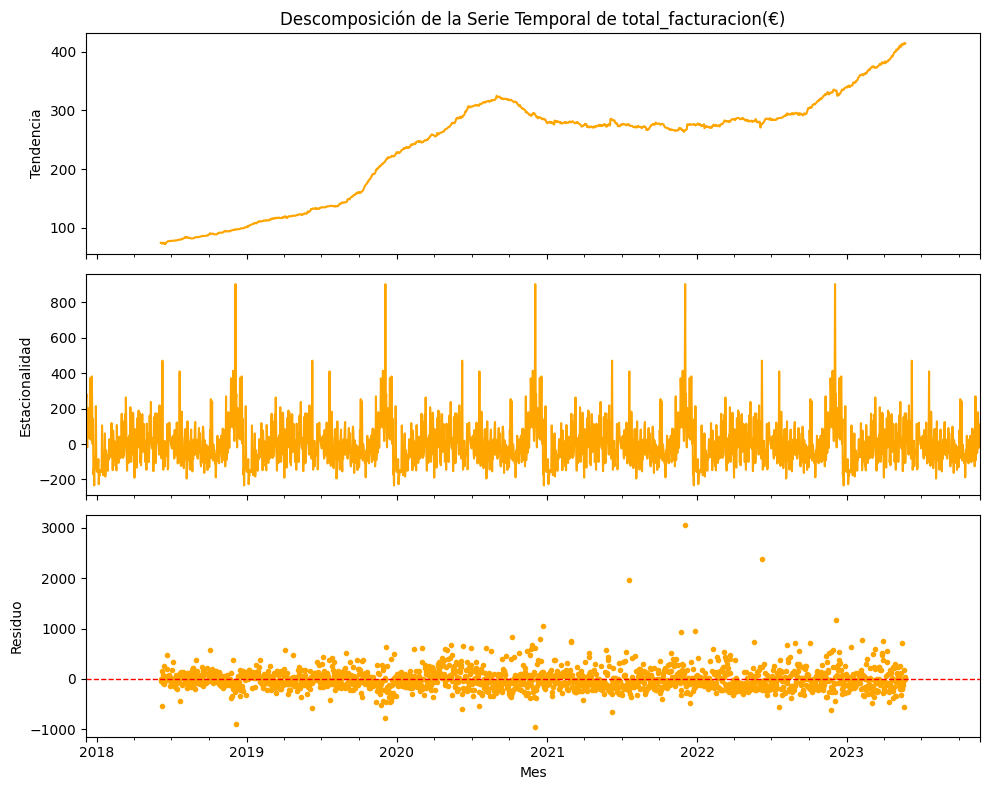

In [12]:
# TENDENCIA, ESTACIONALIDAD Y RUIDO - HISTÓRICO TOTAL PEDIDOS DIARIOS
seasonal_decomposition(timeseries_diario, 'total_facturacion(€)', period=365, color='orange')

#### ZOOM 3 MESES GRÁFICO TOTAL DINERO FACTURADO POR DÍA

In [13]:
zoom_timeseries_diario = timeseries_diario.copy()
start_date = pd.to_datetime('2023-08-01')
end_date = pd.to_datetime('2023-10-31')
zoom_timeseries_diario = zoom_timeseries_diario.loc[start_date:end_date]

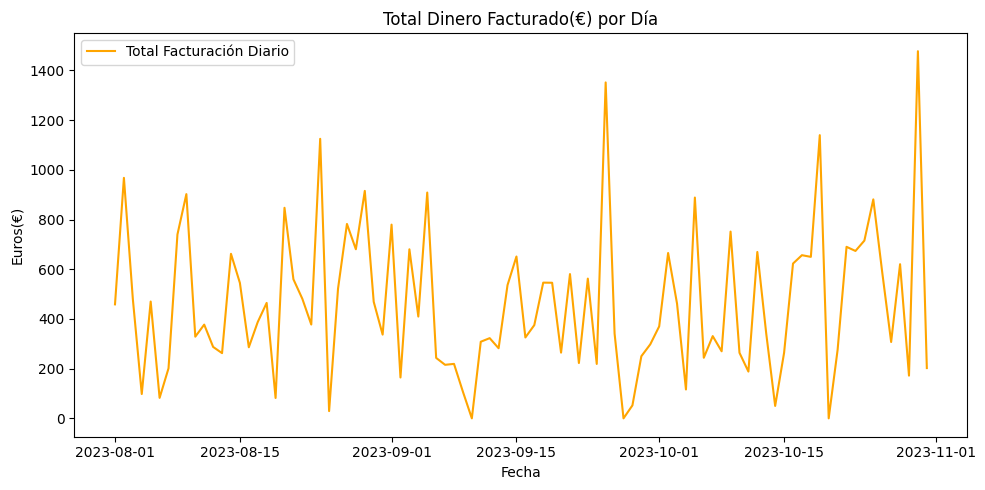

In [14]:
timeseries_facturacion_diario(zoom_timeseries_diario)

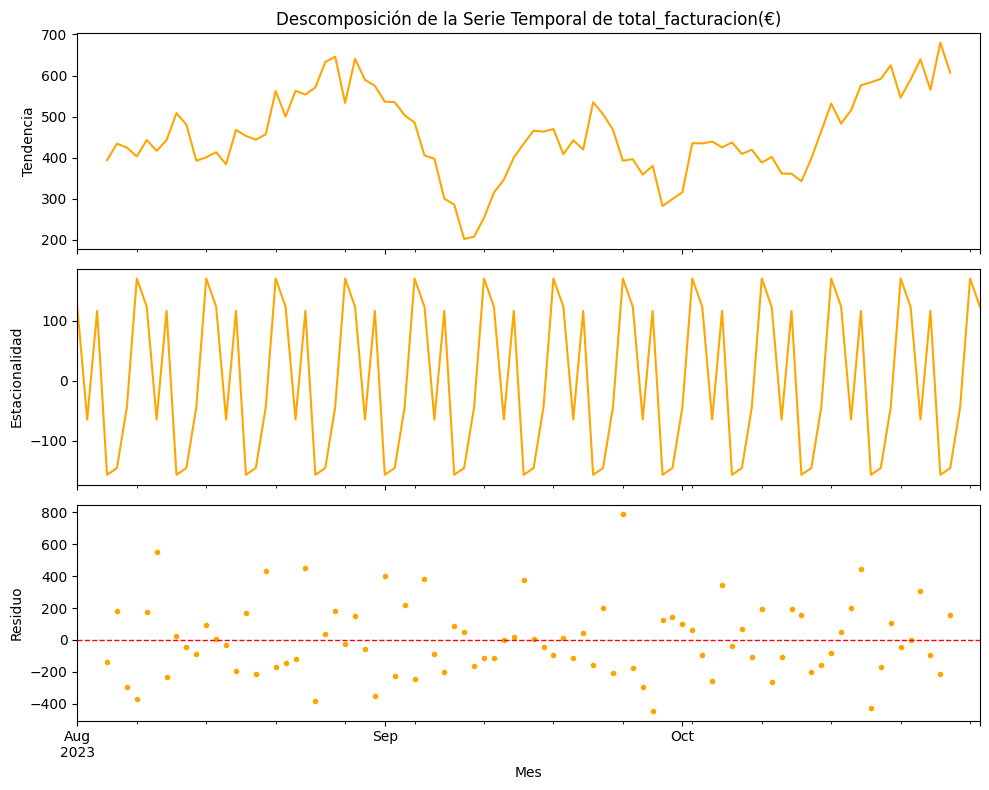

In [15]:
# TENDENCIA, ESTACIONALIDAD Y RUIDO - ZOOM 3 MESES GRÁFICO TOTAL DINERO FACTURADO POR DÍA
seasonal_decomposition(zoom_timeseries_diario, 'total_facturacion(€)', period=7, color='orange')

#### AUTOCORRELACIÓN FACTURACION DIARIA

In [16]:
nlags=365*5
autocorr = acf(timeseries_diario['total_facturacion(€)'], nlags=nlags)

Text(0.5, 1.0, 'Gráfico Autocorrelación - Facturación Diaria')

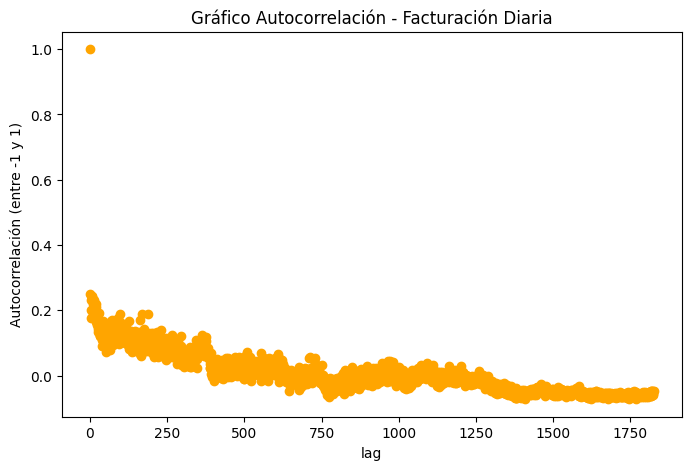

In [17]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr, color='orange')
plt.ylabel('Autocorrelación (entre -1 y 1)')
plt.xlabel('lag')
plt.title('Gráfico Autocorrelación - Facturación Diaria')

#### ATUCOCORRELACIÓN PARCIAL FACTURACION DIARIO

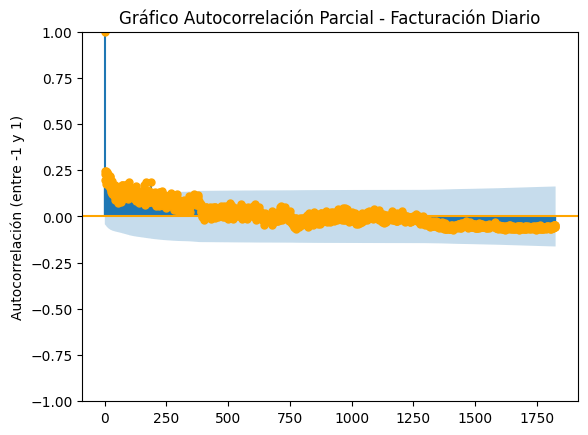

In [18]:
plot_acf(timeseries_diario['total_facturacion(€)'], lags=365*5, color='orange')
plt.ylabel('Autocorrelación (entre -1 y 1)')
plt.title('Gráfico Autocorrelación Parcial - Facturación Diario')
plt.show()

#### GRÁFICO HISTÓRICO TOTAL PEDIDOS DIARIOS

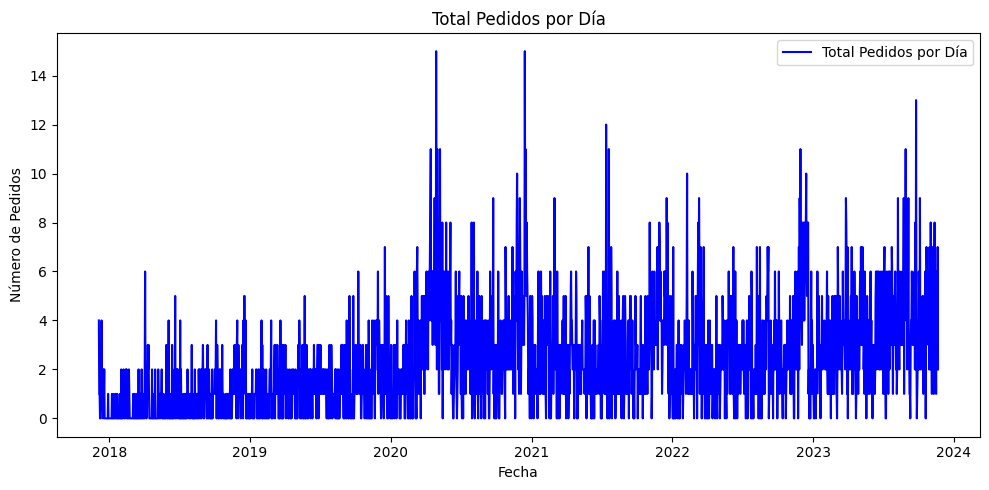

In [19]:
timeseries_pedidos_diario(timeseries_diario)

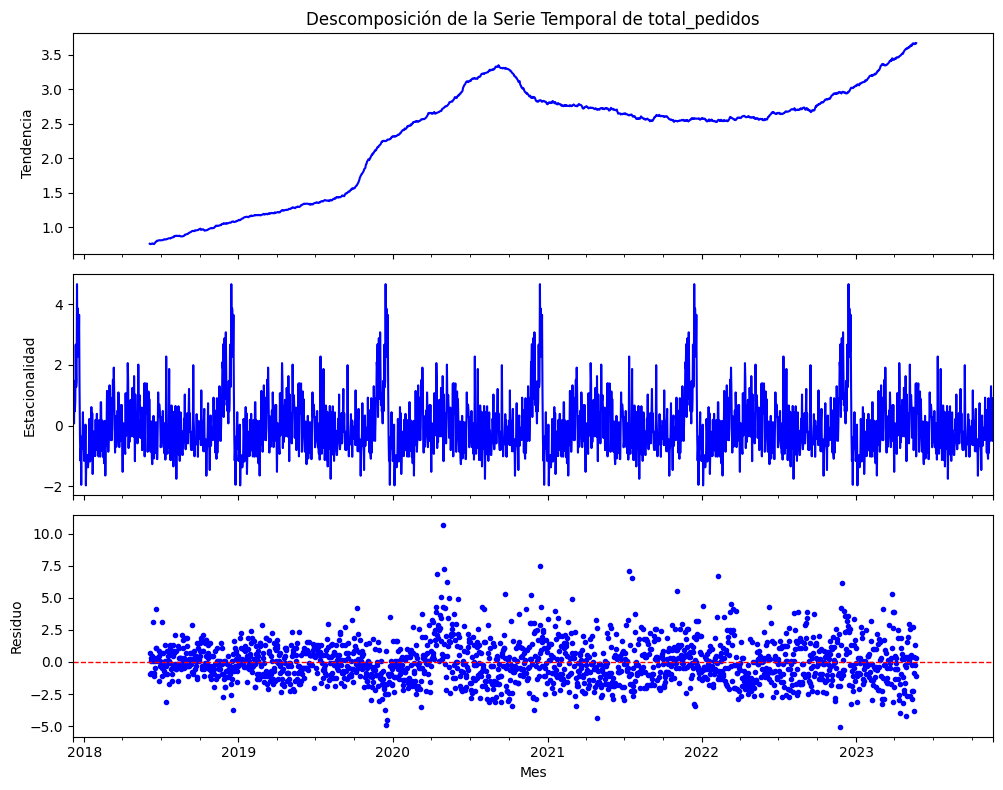

In [20]:
# TENDENCIA, ESTACIONALIDAD Y RUIDO - HISTÓRICO FACTURACIÓN DIARIA EN €
seasonal_decomposition(timeseries_diario, 'total_pedidos', period=365, color='blue')

#### ZOOM 3 MESES GRÁFICO TOTAL PEDIDOS DIARIOS

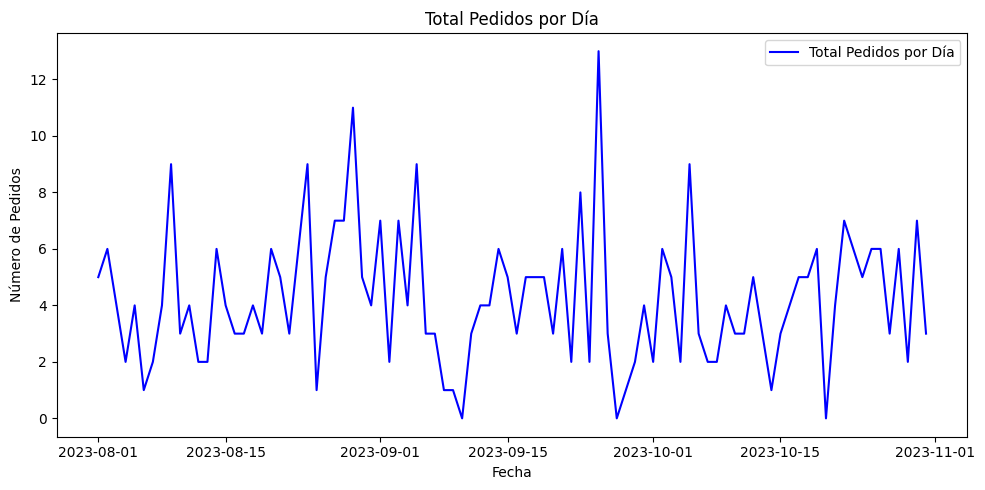

In [21]:
timeseries_pedidos_diario(zoom_timeseries_diario)

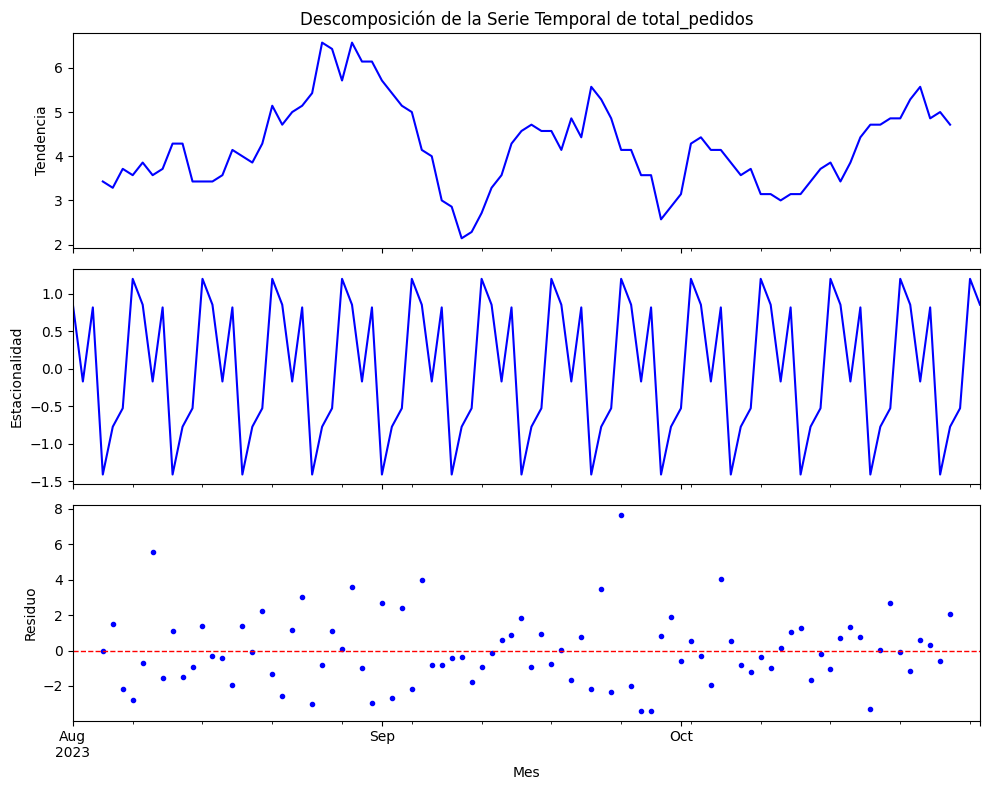

In [22]:
# TENDENCIA, ESTACIONALIDAD Y RUIDO - ZOOM 3 MESES GRÁFICO TOTAL PEDIDOS DIARIOS
seasonal_decomposition(zoom_timeseries_diario, 'total_pedidos', period=7, color='blue')

#### AUTOCORRELACIÓN PEDIDOS DIARIOS

In [23]:
nlags=365*5
autocorr = acf(timeseries_diario['total_pedidos'], nlags=nlags)

Text(0.5, 1.0, 'Gráfico Autocorrelación - Pedidos Diario')

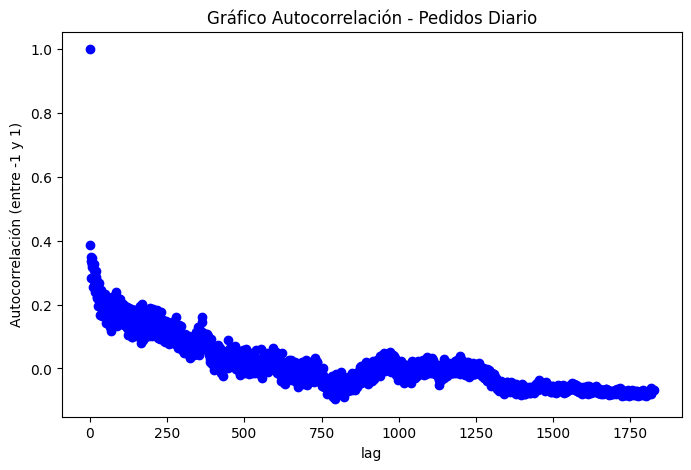

In [24]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr, color='blue')
plt.ylabel('Autocorrelación (entre -1 y 1)')
plt.xlabel('lag')
plt.title('Gráfico Autocorrelación - Pedidos Diario')

#### ATUCOCORRELACIÓN PARCIAL PEDIDOS DIARIOS

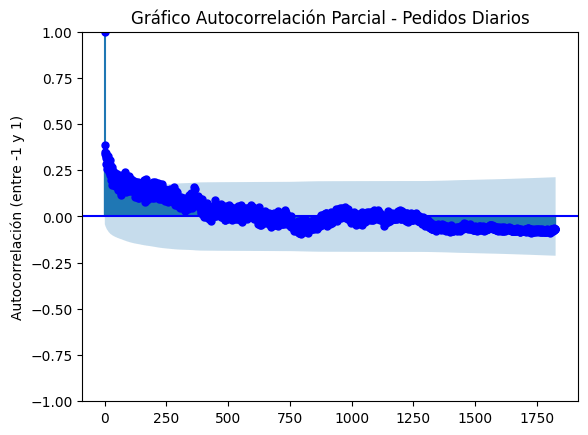

In [25]:
plot_acf(timeseries_diario['total_pedidos'], lags=365*5, color='blue')
plt.ylabel('Autocorrelación (entre -1 y 1)')
plt.title('Gráfico Autocorrelación Parcial - Pedidos Diarios')
plt.show()